In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start_date = '2021-01-01'
end_date = '2023-01-01'

In [ ]:
stocks = ['AAPL','GOOGL','MSFT','AMZN']

In [ ]:
for stock_symbol in stocks:
  df = pd.DataFrame()
  stock_data = yf.download(stock_symbol,start=start_date,end=end_date)
  stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
  s = ""
  s = 'stock_data_' + stock_symbol + '.csv'
  df = pd.concat([df, stock_data], axis=1)
  df.to_csv(s, index=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data_AAPL = pd.read_csv('stock_data_AAPL.csv',index_col = 'Date')
stock_data_AMZN = pd.read_csv('stock_data_AMZN.csv',index_col = 'Date')
stock_data_GOOGL = pd.read_csv('stock_data_GOOGL.csv',index_col = 'Date')
stock_data_MSFT = pd.read_csv('stock_data_MSFT.csv',index_col = 'Date')
stock_data_AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164177,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736404,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402924,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647980,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758347,105158200


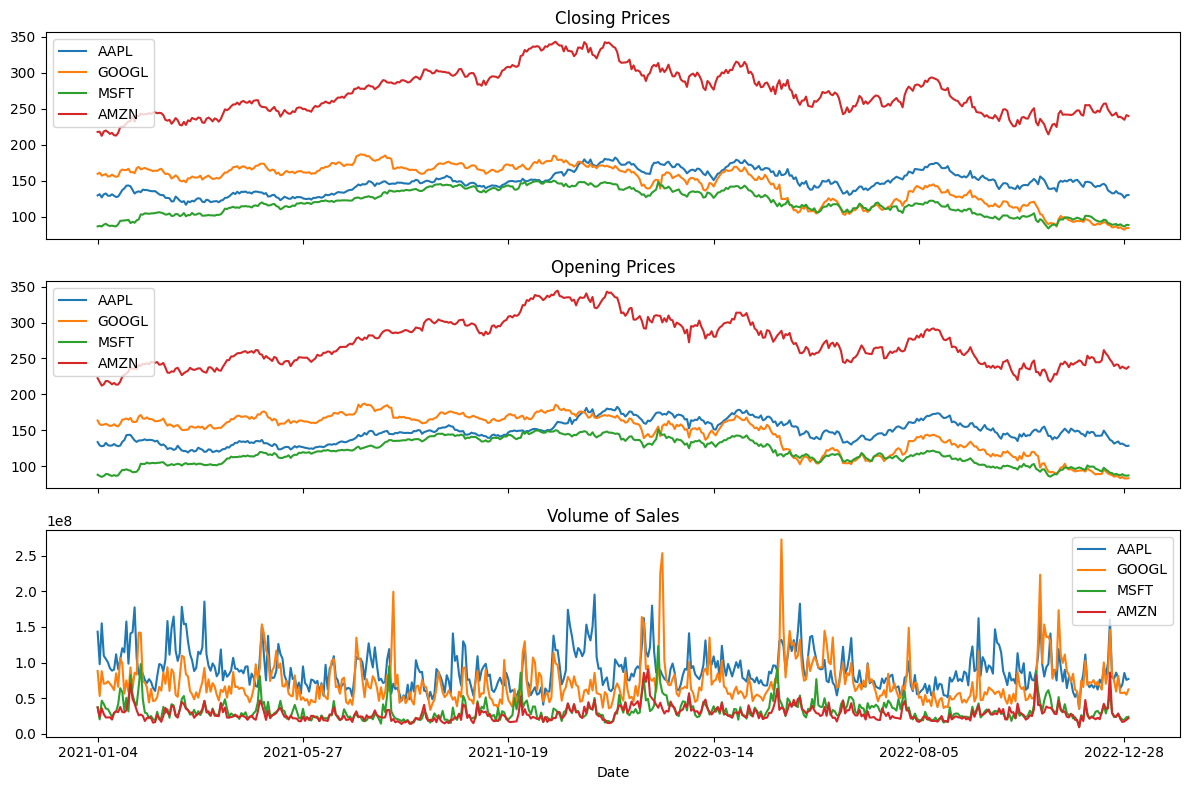

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)
stock_data_AAPL['Close'].plot(ax=axes[0], title='Closing Prices')
stock_data_AAPL['Open'].plot(ax=axes[1], title='Opening Prices')
stock_data_AAPL['Volume'].plot(ax=axes[2], title='Volume of Sales')
stock_data_AMZN['Close'].plot(ax=axes[0], title='Closing Prices')
stock_data_AMZN['Open'].plot(ax=axes[1], title='Opening Prices')
stock_data_AMZN['Volume'].plot(ax=axes[2], title='Volume of Sales')
stock_data_GOOGL['Close'].plot(ax=axes[0], title='Closing Prices')
stock_data_GOOGL['Open'].plot(ax=axes[1], title='Opening Prices')
stock_data_GOOGL['Volume'].plot(ax=axes[2], title='Volume of Sales')
stock_data_MSFT['Close'].plot(ax=axes[0], title='Closing Prices')
stock_data_MSFT['Open'].plot(ax=axes[1], title='Opening Prices')
stock_data_MSFT['Volume'].plot(ax=axes[2], title='Volume of Sales')
axes[0].legend(stocks)
axes[1].legend(stocks)
axes[2].legend(stocks)
plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
start_date = '2022-01-01'
end_date = '2024-01-01'

In [ ]:
stock_data = yf.download(stocks,start=start_date,end=end_date)
stock_data.head()

[*********************100%%**********************]  4 of 4 completed


Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  179.953888  170.404495  144.991501  328.727692  182.009995   
2022-01-04  177.669983  167.522003  144.399506  323.090912  179.699997   
2022-01-05  172.943970  164.356995  137.774994  310.688171  174.919998   
2022-01-06  170.056992  163.253998  137.747498  308.233124  172.000000   
2022-01-07  170.225082  162.554001  137.016998  308.390259  172.169998   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003  144.399506  329.010010  182.940002  171.399994  ...   
2022-01-05  164.356995  137.774994  316.380005  180.169998  167.126495  ...   
2022-01-06  163.253998  137.747498  313.880005  175.300003  164.800003  ...   
2022-01-07  162.554001  137.016998  314.040009  174.139999  165.243500  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2022-01-03  143.712997  329.779999  177.830002  167.550003  145.054993   
2022-01-04  143.716507  326.119995  182.630005  170.438004  145.395996   
2022-01-05  137.688004  315.980011  179.610001  166.882996  144.419998   
2022-01-06  136.558502  311.489990  172.699997  163.450500  136.998505   
2022-01-07  135.766495  310.089996  172.889999  163.839005  138.145493   

                           Volume                                
                  MSFT       AAPL      AMZN     GOOGL      MSFT  
Date                                                             
2022-01-03  335.350006  104487900  63520000  28646000  28865100  
2022-01-04  334.829987   99310400  70726000  28400000  32674300  
2022-01-05  325.859985   94537600  64302000  54618000  40054300  
2022-01-06  313.149994   96904000  51958000  37348000  39646100  
2022-01-07  314.149994   86709100  46606000  29760000  32720000  

[5 rows x 24 columns]

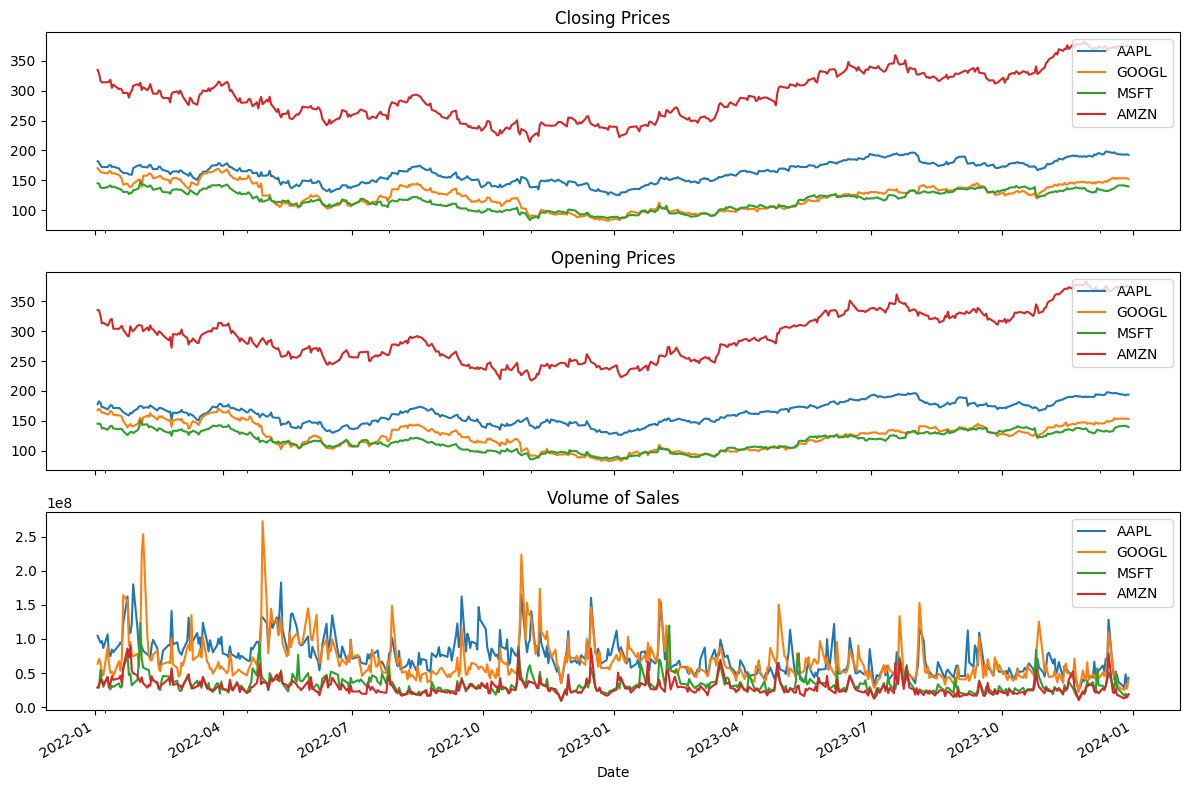

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)
stock_data['Close'].plot(ax=axes[0], title='Closing Prices')
stock_data['Open'].plot(ax=axes[1], title='Opening Prices')
stock_data['Volume'].plot(ax=axes[2], title='Volume of Sales')
axes[0].legend(stocks)
axes[1].legend(stocks)
axes[2].legend(stocks)
plt.tight_layout()
plt.show()

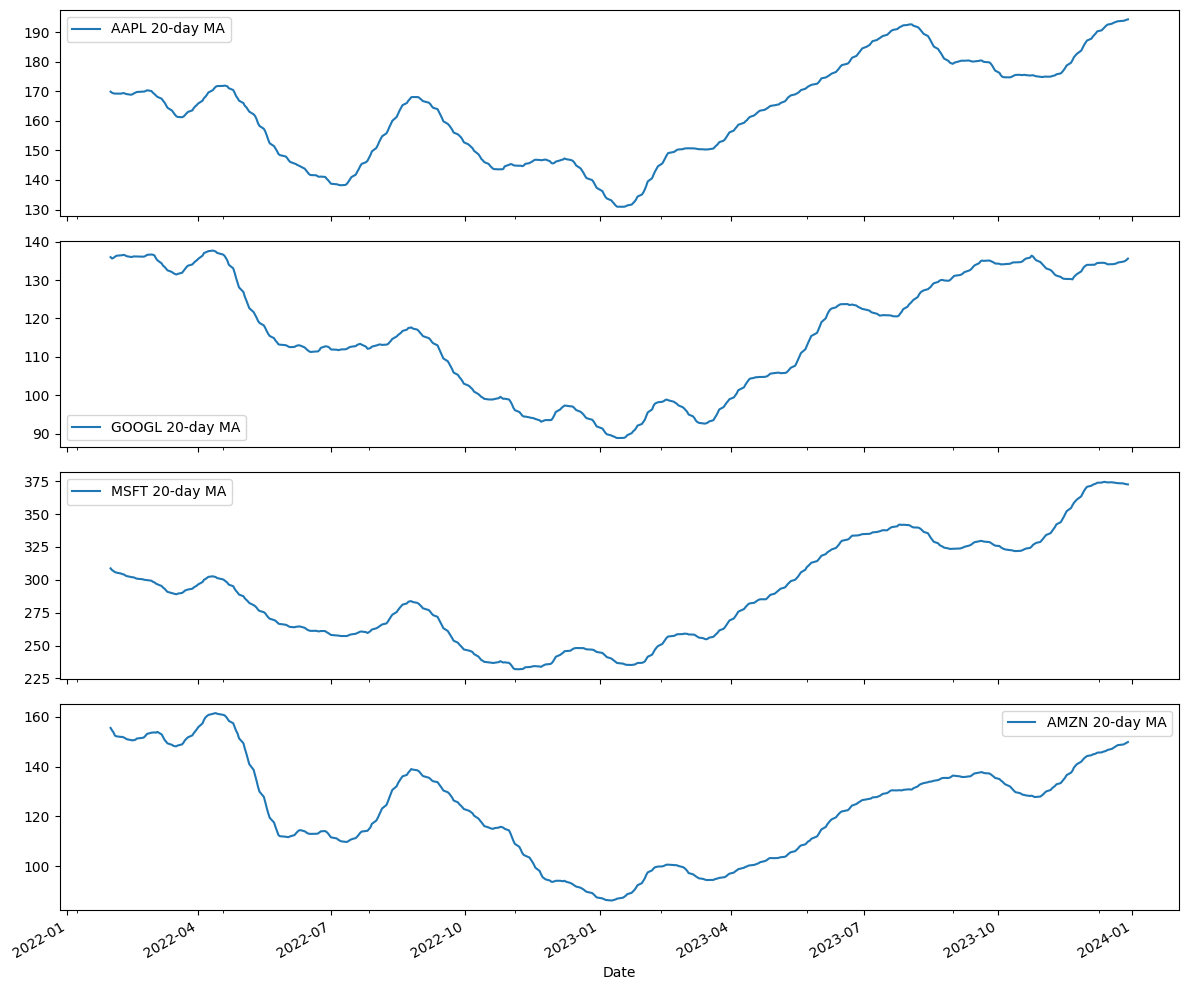

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

for stock in stocks:
    stock_data['Close'][stock].rolling(window=20).mean().plot(label=f'{stock} 20-day MA', ax=axes[stocks.index(stock)])

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
daily_returns = stock_data['Adj Close'].pct_change()
print(daily_returns.head())
monthly_returns = daily_returns.resample('M').mean()
print(monthly_returns.head())

                AAPL      AMZN     GOOGL      MSFT
Date                                              
2022-01-04 -0.012692 -0.016916 -0.004083 -0.017147
2022-01-05 -0.026600 -0.018893 -0.045876 -0.038388
2022-01-06 -0.016693 -0.006711 -0.000200 -0.007902
2022-01-07  0.000988 -0.004288 -0.005303  0.000510
2022-01-10  0.000116 -0.006570  0.012061  0.000732
                AAPL      AMZN     GOOGL      MSFT
Date                                              
2022-01-31 -0.001912 -0.006575 -0.003457 -0.003676
2022-02-28 -0.002813  0.002179  0.000255 -0.001759
2022-03-31  0.002622  0.002919  0.001485  0.001573
2022-04-30 -0.004878 -0.012672 -0.009555 -0.004940
2022-05-31 -0.002200 -0.000930  0.000195 -0.000583


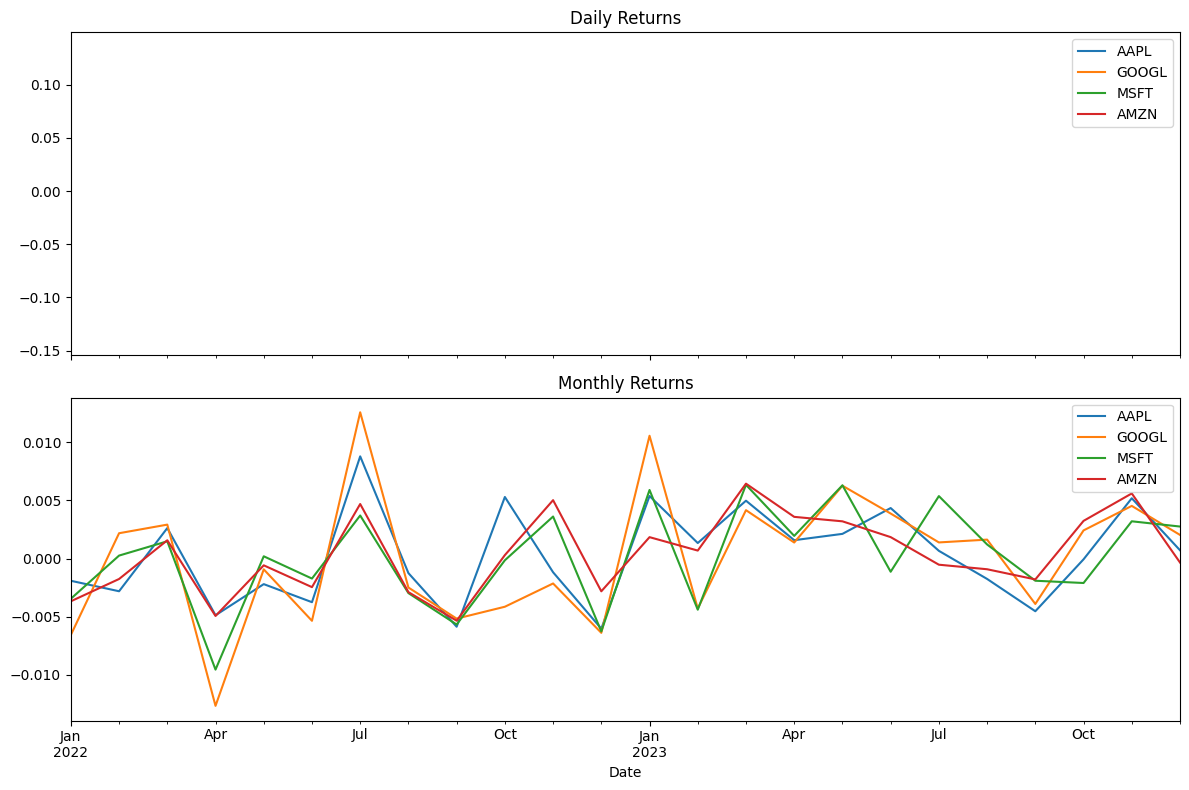

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
daily_returns.plot(ax=axes[0], title='Daily Returns')
monthly_returns.plot(ax=axes[1], title='Monthly Returns')
axes[0].legend(stocks)
axes[1].legend(stocks)
plt.tight_layout()
plt.show()